## Step 1: Load the corpus using load files and make sure you set the encoding to latin1. (Task 1.3)

### Get and group the data

In [1]:
import sklearn.datasets


def load_files_of_bbc(category=None):
    """
    Gets the corpus of data
    :param category: The category/class of the the instance
    :return: The corpus, the length and list of file names
    """
    files_load = sklearn.datasets.load_files('../data/BBC', description="""
     D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.6
     """, categories=category, encoding='latin1')
    length = len(files_load.data)
    files_names = [fp[fp.find("\\")+1:] for fp in files_load.filenames]
    return files_load, length,files_names


#all BBC data and size
allBBCFiles, allBBCDataSize, allBBC_filenames = load_files_of_bbc()

# #BBC business Data and size
businessFiles, businessDataSize, business_filenames = load_files_of_bbc('business')

# #BBC entertainment Data and size
entertainmentFiles, entertainmentDataSize, entertainment_filenames = load_files_of_bbc('entertainment')

# #BBC politics Data and size
politicsFiles, politicsDataSize, politics_filenames = load_files_of_bbc('politics')

# #BBC sport Data and size
sportFiles, sportDataSize, sport_filenames = load_files_of_bbc('sport')

# #BBC tech Data
techFiles, techDataSize, tech_filenames = load_files_of_bbc('tech')

## Step 2: Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf. (Task 1.2)

### Create Dataframe

In [2]:
import pandas as pd

allBBC_DF = pd.DataFrame({
    'Business': businessDataSize,
    'Entertainment': entertainmentDataSize,
    'Politics': politicsDataSize,
    'Sport': sportDataSize,
    'Tech': techDataSize
},
    index=['Records Count']
)

allBBC_DF

,Business,Entertainment,Politics,Sport,Tech
Records Count,510,386,417,511,401


### Plot the distribution of the instances in each class

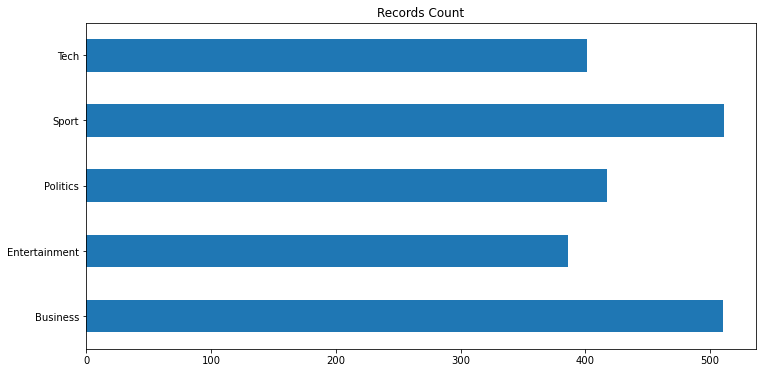

In [5]:
%matplotlib inline

sp = allBBC_DF.loc['Records Count'].plot(by=allBBCFiles.target_names, title='Records Count', figsize=(12, 6),
                                         kind='barh')

### Save the graphic in a file called BBC-distribution.pdf

In [ ]:
fig = sp.get_figure()
fig.savefig('../out/BBC-distribution.pdf')

## Step 3: Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. (Task 1.4)

### Prepare the vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


def get_matrix_and_vocabulary(data):
    return vectorizer.fit_transform(data).toarray(), {k: v for k, v in
                                                      sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])}

### Extract matrices

In [ ]:
# TODO: purify data
# Not sure if I'm doing things right here!
allBBCMatrix, allBBCVocab = get_matrix_and_vocabulary(allBBCFiles.data)
businessMatrix, businessVocab = get_matrix_and_vocabulary(businessFiles.data)
entertainmentMatrix, entertainmentVocab = get_matrix_and_vocabulary(entertainmentFiles.data)
politicsMatrix, politicsVocab = get_matrix_and_vocabulary(politicsFiles.data)
sportMatrix, sportVocab = get_matrix_and_vocabulary(sportFiles.data)
techMatrix, techVocab = get_matrix_and_vocabulary(techFiles.data)
